In [1]:
import numpy as np
ls = 2**13
data = np.fromfile('soliton.bin')
lt = np.shape(data)[0]//(3*ls)
# data = data.reshape(ls*lt, 3)
data = data.reshape(np.shape(data)[0]//3, 3)
radius = np.zeros((ls))
time = np.zeros((lt))
field = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    radius[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        field[i,j] = data[ls*i+j,2]        

In [2]:
print(time)

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

In [3]:
with np.printoptions(threshold=np.inf):
    print(time)

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

In [4]:
print(field)

[[ 1.25961509e-42  1.39044990e-42  1.53487438e-42 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.43376778e-19  2.26883278e-19 -2.89601164e-19 ...  1.45462590e-19
  -9.17427414e-20  7.99584088e-20]
 [ 6.22048471e-20  4.24947296e-20 -1.19991609e-19 ...  2.84916794e-20
   6.60657558e-20 -1.10671434e-19]
 ...
 [-1.91797811e-19  1.28491015e-19 -6.87553561e-20 ...  4.71055538e-20
   1.31775519e-19 -1.38168603e-19]
 [-7.57066162e-20  3.45112789e-20 -2.02550279e-20 ...  3.41198460e-20
   1.62477056e-19 -2.14018612e-19]
 [ 8.08576990e-20 -1.63453094e-19  1.19331134e-19 ... -1.64480323e-19
   2.91133707e-19 -3.18121354e-19]]


(100.0, 500.0)

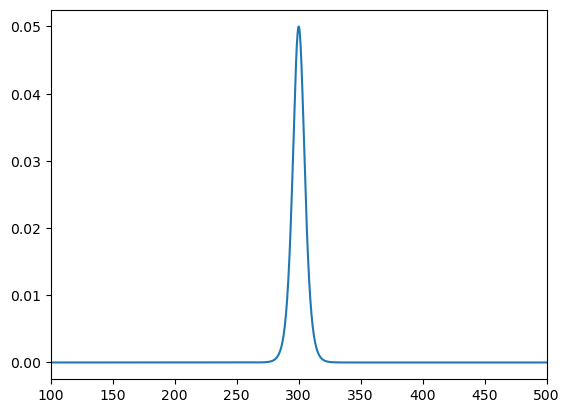

In [5]:
import matplotlib.pyplot as pl
pl.plot(radius[:], field[0,:])
pl.xlim(100,500)

(100.0, 500.0)

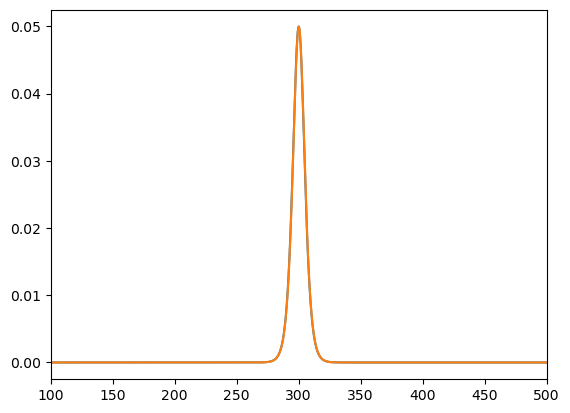

In [6]:
# for i in range(lt):
    # pl.plot(radius[:], field[i,:])
    # pl.xlim(400,600)
pl.plot(radius[:], field[1,:])
pl.plot(radius[:], field[lt-1,:])
pl.xlim(100,500)